# Naïve Bayes Classifier

## Gaussian Naïve Bayes

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
data = load_breast_cancer()

In [3]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
label_names = data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data']

In [5]:
print(label_names)

['malignant' 'benign']


In [6]:
print(labels[50])

1


In [7]:
print(feature_names[0])

mean radius


In [8]:
print(features[0])

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


In [9]:
x_train, y_train, x_test, y_test = train_test_split(features, labels, test_size = 0.30, random_state = 42)

In [10]:
from sklearn.naive_bayes import GaussianNB

In [11]:
GNBclf = GaussianNB()
model = GNBclf.fit(x_train, x_test)

In [12]:
preds = GNBclf.predict(y_train)

In [13]:
print(preds)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0]


In [14]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, preds)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.94


# Decision Tree

In [15]:
from sklearn import tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [16]:
df = pd.read_csv('Titanic.csv')

In [17]:
df = df.drop('Cabin', axis=1)

In [25]:
label_encoder = LabelEncoder()
imputer = SimpleImputer()

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [27]:
X = df.iloc[:,2:]
y = df.iloc[:,1]

In [28]:
print(X)

     Pclass                                          Name     Sex   Age  \
0         3                              Kelly, Mr. James    male  34.5   
1         3              Wilkes, Mrs. James (Ellen Needs)  female  47.0   
2         2                     Myles, Mr. Thomas Francis    male  62.0   
3         3                              Wirz, Mr. Albert    male  27.0   
4         3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0   
..      ...                                           ...     ...   ...   
413       3                            Spector, Mr. Woolf    male   NaN   
414       1                  Oliva y Ocana, Dona. Fermina  female  39.0   
415       3                  Saether, Mr. Simon Sivertsen    male  38.5   
416       3                           Ware, Mr. Frederick    male   NaN   
417       3                      Peter, Master. Michael J    male   NaN   

     SibSp  Parch              Ticket      Fare Embarked  
0        0      0              330911   

In [29]:
print(y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [30]:
X_encoded = X.copy()
categorical_columns = ['Name','Sex','Embarked','Ticket']
for i in categorical_columns:
    X_encoded[i] = label_encoder.fit_transform(X_encoded[i])

In [31]:
X_encoded_new = imputer.fit_transform(X_encoded)

In [32]:
print(X_encoded_new)

[[  3.     206.       1.     ... 152.       7.8292   1.    ]
 [  3.     403.       0.     ... 221.       7.       2.    ]
 [  2.     269.       1.     ...  73.       9.6875   1.    ]
 ...
 [  3.     332.       1.     ... 346.       7.25     2.    ]
 [  3.     384.       1.     ... 220.       8.05     2.    ]
 [  3.     302.       1.     ... 105.      22.3583   0.    ]]


In [33]:
X_encoded_df = pd.DataFrame(X_encoded_new, columns=['Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Embarked'])

In [34]:
print(X_encoded_df)

     Pclass   Name  Sex       Age  SibSp  Parch  Ticket      Fare  Embarked
0       3.0  206.0  1.0  34.50000    0.0    0.0   152.0    7.8292       1.0
1       3.0  403.0  0.0  47.00000    1.0    0.0   221.0    7.0000       2.0
2       2.0  269.0  1.0  62.00000    0.0    0.0    73.0    9.6875       1.0
3       3.0  408.0  1.0  27.00000    0.0    0.0   147.0    8.6625       2.0
4       3.0  178.0  0.0  22.00000    1.0    1.0   138.0   12.2875       2.0
..      ...    ...  ...       ...    ...    ...     ...       ...       ...
413     3.0  353.0  1.0  30.27259    0.0    0.0   267.0    8.0500       2.0
414     1.0  283.0  0.0  39.00000    0.0    0.0   324.0  108.9000       0.0
415     3.0  332.0  1.0  38.50000    0.0    0.0   346.0    7.2500       2.0
416     3.0  384.0  1.0  30.27259    0.0    0.0   220.0    8.0500       2.0
417     3.0  302.0  1.0  30.27259    1.0    1.0   105.0   22.3583       0.0

[418 rows x 9 columns]


In [35]:
print(y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [36]:
X_train,X_test,y_train,y_test = train_test_split(X_encoded_df,y,test_size = 0.3,random_state = 42)

In [37]:
print(X_train)

     Pclass   Name  Sex       Age  SibSp  Parch  Ticket      Fare  Embarked
118     1.0   28.0  1.0  36.00000    0.0    0.0    33.0   75.2417       0.0
271     3.0  146.0  1.0  30.27259    0.0    0.0   235.0    7.7500       1.0
114     1.0  364.0  0.0  63.00000    1.0    0.0   303.0  221.7792       2.0
311     3.0  380.0  1.0  22.00000    0.0    0.0   101.0    7.2250       0.0
131     1.0  161.0  1.0  53.00000    0.0    0.0    17.0   28.5000       0.0
..      ...    ...  ...       ...    ...    ...     ...       ...       ...
71      3.0  263.0  1.0  21.00000    0.0    0.0   194.0    7.8958       2.0
106     3.0   52.0  1.0  21.00000    0.0    0.0   153.0    7.8208       1.0
270     1.0  252.0  1.0  46.00000    0.0    0.0    33.0   75.2417       0.0
348     2.0  157.0  1.0  24.00000    0.0    0.0    82.0   13.5000       2.0
102     3.0  141.0  1.0  30.27259    0.0    0.0   227.0    7.7500       1.0

[292 rows x 9 columns]


In [38]:
print(X_test)

     Pclass   Name  Sex       Age  SibSp  Parch  Ticket      Fare  Embarked
321     3.0  218.0  1.0  25.00000    0.0    0.0    97.0    7.2292       0.0
324     1.0  219.0  0.0  39.00000    0.0    0.0    75.0  211.3375       2.0
388     3.0   58.0  1.0  21.00000    0.0    0.0   225.0    7.7500       1.0
56      3.0   86.0  1.0  35.00000    0.0    0.0   198.0    7.8958       2.0
153     3.0  217.0  0.0  36.00000    0.0    2.0   214.0   12.1833       2.0
..      ...    ...  ...       ...    ...    ...     ...       ...       ...
101     2.0  391.0  1.0  27.00000    1.0    0.0    57.0   26.0000       2.0
310     3.0   56.0  1.0  18.00000    0.0    0.0   142.0    8.6625       2.0
29      3.0  339.0  1.0  30.27259    2.0    0.0   104.0   21.6792       0.0
195     3.0  200.0  1.0  33.00000    0.0    0.0   187.0    7.8542       2.0
390     1.0  294.0  1.0  23.00000    0.0    0.0    32.0   93.5000       2.0

[126 rows x 9 columns]


In [39]:
DTCclf = DecisionTreeClassifier()
DTCclf.fit(X_train,y_train)

DecisionTreeClassifier()

In [40]:
from sklearn.metrics import accuracy_score
y_pred = DTCclf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)

In [41]:
print(accuracy * 100)

100.0


In [42]:
new_data = pd.DataFrame({
    'Pclass': [3, 1],   # Example values for the features used in training
    'Name': [206, 283],
    'Sex': [1, 0],
    'Age': [34.5, 39.0],
    'SibSp': [0, 0],
    'Parch': [0, 0],
    'Ticket': [152, 324],
    'Fare': [7.8292, 108.9000],
    'Embarked': [1, 0]
})
predictions = DTCclf.predict(new_data)
print(predictions)

[0 1]


In [43]:
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[85  0]
 [ 0 41]]


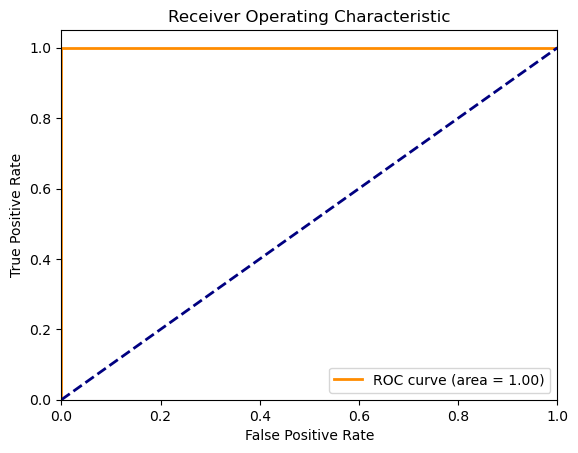

In [44]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [45]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(DTCclf, X_encoded_df, y, cv=5)  # Adjust cv value as needed
print("Cross-Validation Scores:", cross_val_scores)
print("Mean CV Score:", cross_val_scores.mean())


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Score: 1.0


# Regression with decision trees

In [46]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [47]:
x = [[1,3],[8,6]]
y = [3.5,10]

In [48]:
DTRrg = tree.DecisionTreeRegressor()

In [49]:
DTRrg.fit(x,y)

DecisionTreeRegressor()

In [50]:
DTRrg.predict([[12,23.1]])

array([10.])

# Random Forest Classifier

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [52]:
df = pd.read_csv('KNNDataset.csv')

In [53]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [54]:
X = df.iloc[:,2:31]
y = df.iloc[:,1]

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [56]:
print(X_train)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
149       13.740         17.91           88.12      585.0          0.07944   
124       13.370         16.39           86.10      553.5          0.07115   
421       14.690         13.98           98.22      656.1          0.10310   
195       12.910         16.33           82.53      516.4          0.07941   
545       13.620         23.23           87.19      573.2          0.09246   
..           ...           ...             ...        ...              ...   
71         8.888         14.64           58.79      244.0          0.09783   
106       11.640         18.33           75.17      412.5          0.11420   
270       14.290         16.82           90.30      632.6          0.06429   
435       13.980         19.62           91.12      599.5          0.10600   
102       12.180         20.52           77.22      458.7          0.08013   

     compactness_mean  concavity_mean  concave points_mean  sym

In [57]:
st_TA = StandardScaler()
X_train = st_TA.fit_transform(X_train)
X_test = st_TA.transform(X_test)

In [58]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [59]:
y_pred = classifier.predict(X_test)

In [60]:
print(y_pred)

['B' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B'
 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M'
 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M'
 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B'
 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B']


In [61]:
print(y_test)

204    B
70     M
131    M
431    B
540    B
      ..
69     B
542    B
176    B
501    M
247    B
Name: diagnosis, Length: 171, dtype: object


In [62]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[107   1]
 [  4  59]]


In [63]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\bin'

In [64]:
estimator = classifier.estimators_[5]
# Export as dot file
str_tree = export_graphviz(estimator, out_file='tree.dot', 
                feature_names = df.columns[2:31],
                class_names = df['diagnosis'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [65]:
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 97.08%


In [68]:
result = classification_report(y_test,y_pred)
print("Classification Report: ")
print(result)

Classification Report: 
              precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



# Regression with Random Forest

In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [70]:
df = pd.read_csv('House Price India.csv')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

In [74]:
X = df.iloc[:,2:22]
y = df['Price']

In [75]:
print(X)

       number of bedrooms  number of bathrooms  living area  lot area  \
0                       5                 2.50         3650      9050   
1                       4                 2.50         2920      4000   
2                       5                 2.75         2910      9480   
3                       4                 2.50         3310     42998   
4                       3                 2.00         2710      4500   
...                   ...                  ...          ...       ...   
14615                   2                 1.50         1556     20000   
14616                   3                 2.00         1680      7000   
14617                   2                 1.00         1070      6120   
14618                   4                 1.00         1030      6621   
14619                   3                 1.00          900      4770   

       number of floors  waterfront present  number of views  \
0                   2.0                   0                

In [76]:
print(y)

0        2380000
1        1400000
2        1200000
3         838000
4         805000
          ...   
14615     221700
14616     219200
14617     209000
14618     205000
14619     146000
Name: Price, Length: 14620, dtype: int64


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
regressor = RandomForestRegressor(random_state = 42)

In [82]:
regressor.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [83]:
y_pred = regressor.predict(X_test)

In [84]:
mae = mean_absolute_error(y_test,y_pred)
print(mae)

69047.23889534884


In [86]:
mse = mean_squared_error(y_test,y_pred)
print(mse)

18319120272.191254


## Extra-Tree Methods

In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import ExtraTreesClassifier

In [89]:
X,y = make_blobs(n_samples = 10000, n_features = 10, centers = 100, random_state = 42)

In [90]:
print(X)

[[ -4.18924672   0.38673035   2.86686655 ...  -5.94086294  -9.30715227
    0.99933406]
 [  2.84727406  -7.05314983  -4.7436383  ...  -0.05156597   2.27378131
   -7.87374482]
 [ -6.48561462   1.91368474   4.36892089 ...   7.74504219  -4.84317495
    7.10868928]
 ...
 [ -8.6092621    3.22361096  -6.63980941 ...   1.7898859    3.370642
   -8.96915519]
 [  9.11307349   9.39542388   8.25740105 ...   8.87303714  10.07191839
    7.02872688]
 [-10.34750612   7.09958505  -9.12823118 ...   4.71995849   4.77683002
    1.59065819]]


In [91]:
print(y)

[16  2 46 ... 85 24 77]


In [92]:
ETClf = ExtraTreesClassifier(n_estimators = 10, max_depth = None, min_samples_split = 10, random_state = 42)

In [93]:
scores = cross_val_score(ETClf, X,y,cv = 5)
scores.mean()

1.0

### Regression with Extra-Tree Method

In [94]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features = 10, n_informative = 2,random_state = 0, shuffle = False)
ETregr = ExtraTreesRegressor(max_depth = 10,random_state = 0,n_estimators = 100)
ETregr.fit(X, y)

ExtraTreesRegressor(max_depth=10, random_state=0)

In [96]:
print(ETregr.predict([[0, 2, 3, 0, 1, 1, 1, 1, 2, 2]]))

[85.50955817]
